In [62]:
#!pip install xgboost #instal xgboost package

In [63]:
#!pip install scikit-learn==1.7.0

In [64]:
#!pip install yellowbrick #install yellowbrick package

## Data Analytics Solution for Marketing Company



##### By Isaac Owusu Akowuah

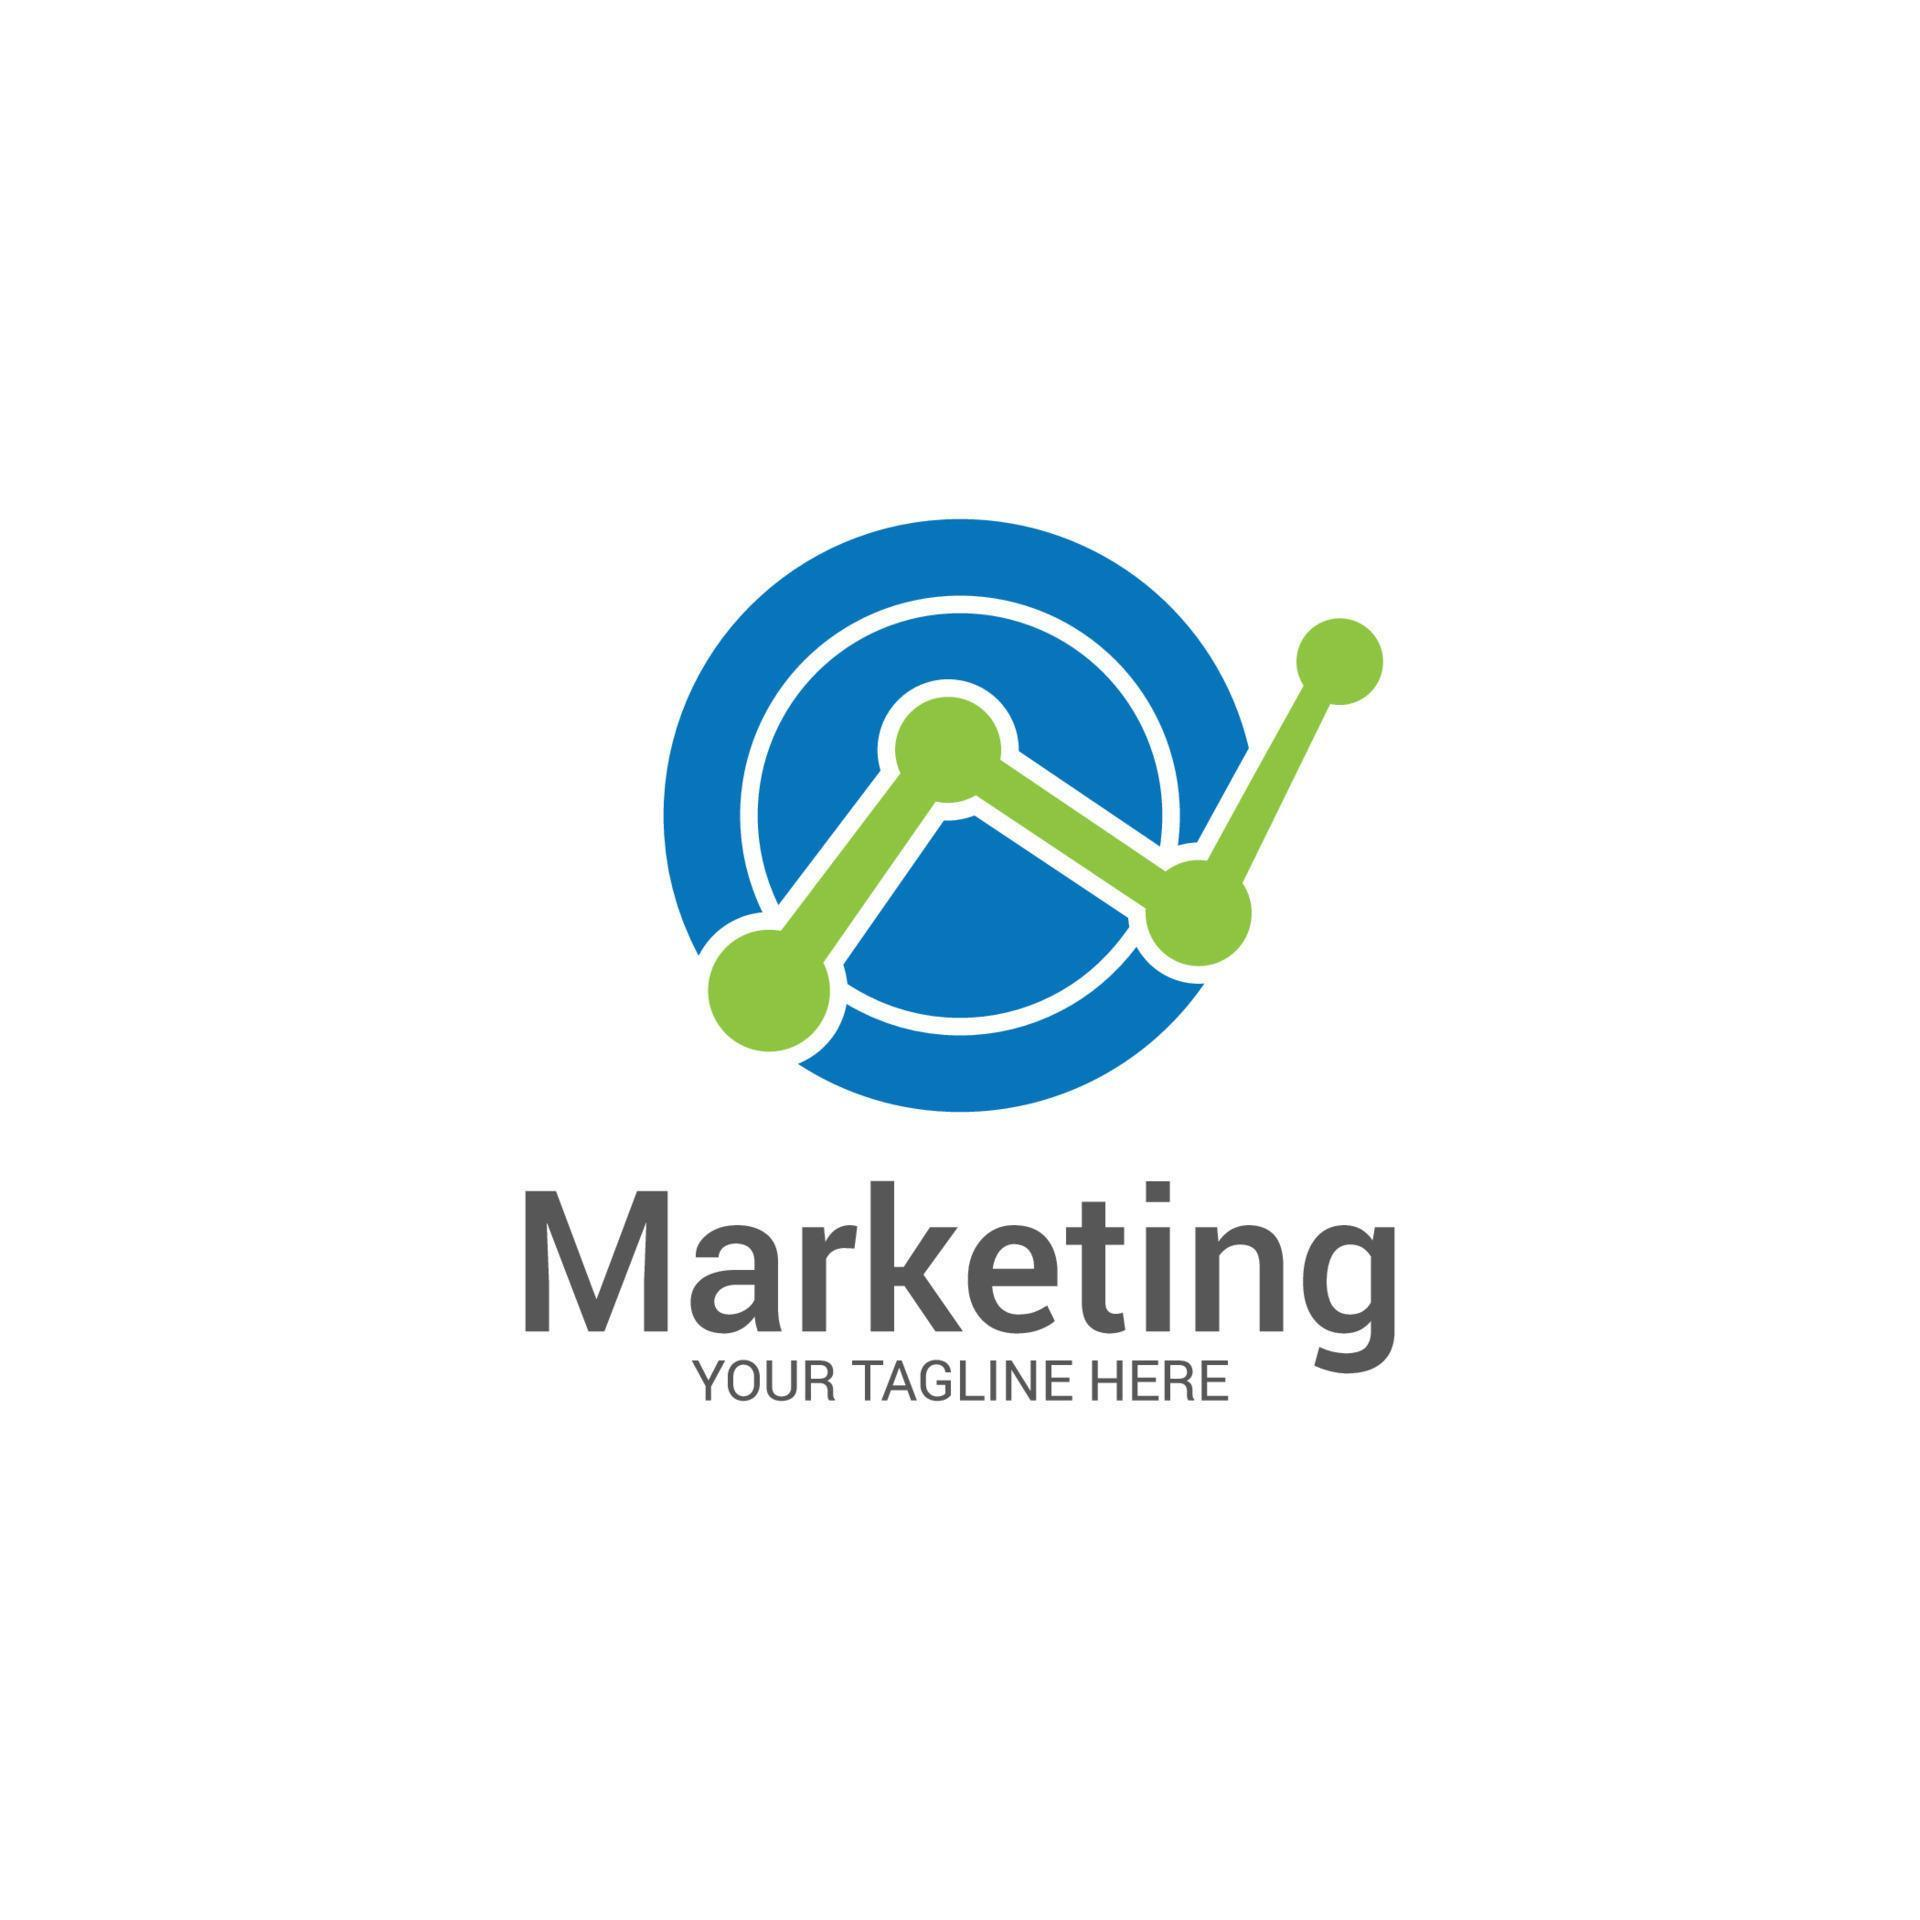

In [65]:
from IPython.display import Image
Image(filename='marketing-logo.jpg')

# **Project Overview**

###For this project,we create data analytics solution that use our operational data to help the business achieve its goals. The objective is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.


---



---



##Importing Libraries

In [66]:
#Import necessary libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, plot, legend, subplots
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style
import joblib
import pickle
import lzma
import warnings
warnings.simplefilter("ignore")

In [67]:
#Model model building libraries
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [68]:
#import Feature plot libraries
from yellowbrick.model_selection import FeatureImportances
from xgboost import plot_importance



---



---



##Exploratory Data Analysis (EDA)



1.   **Initial Data Understanding**

  *   Data loading and Inspection
  *   Data Types
  *   Missing Values
  *   Duplicates



---



---







In [69]:
#import full dataset
df = pd.read_csv('bank-full.csv',delimiter=";", header = 0)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [70]:
#import test dataset
dft = pd.read_csv('bank.csv',delimiter=";", header = 0)
print(dft)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [71]:
#view of first 5 rows of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [72]:
#view of last 5 rows of dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [73]:
#view of number of rowns and columns
df.shape

(45211, 17)

In [74]:
#view of datatypes in dataset
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [75]:
#summary of numerical data
df.select_dtypes(include=('float64','int64')).describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [76]:
#summary of categorical data
df.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [77]:
#check missing values of dataset
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [78]:
#checking for duplicated rows
df.duplicated().sum()

np.int64(0)

<function matplotlib.pyplot.show(close=None, block=None)>

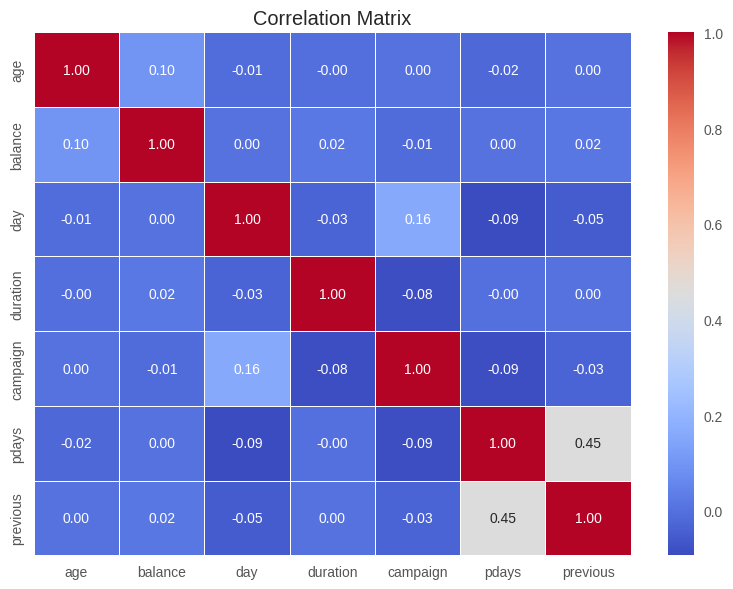

In [79]:
#Correlation Plot
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show

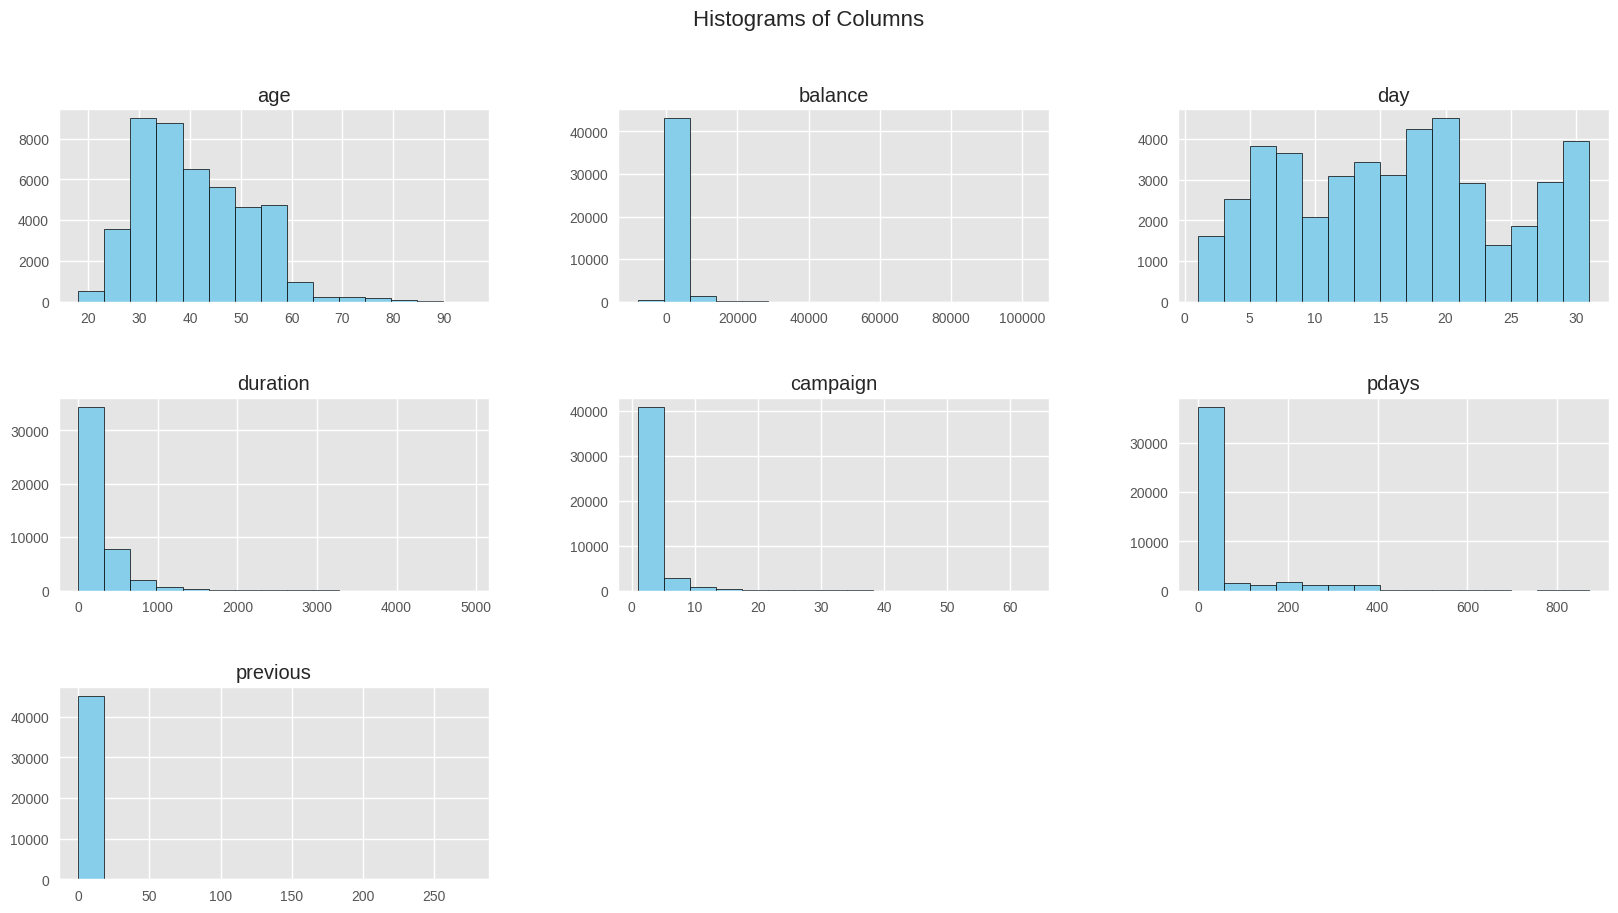

In [80]:
#Histogram of numerical variables
df.hist(bins=15, figsize=(20, 10), color='skyblue', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)
show()

# Distribution of Variables



*   Categorical Features (KDE)





*   Distribution of Selected Variables of Marketing Campaign results






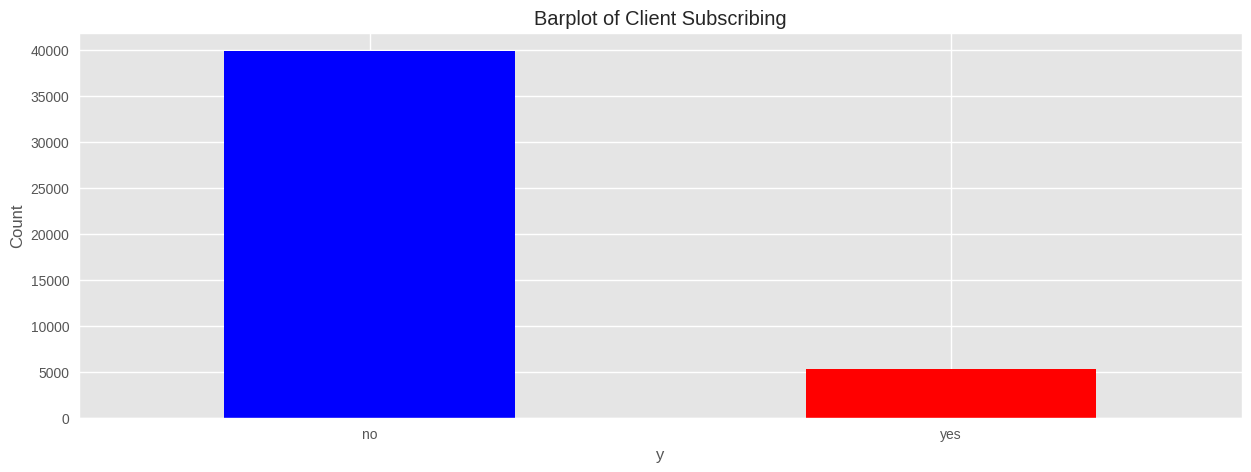

In [81]:
#Barplot of Target variable
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['y'].value_counts()
colors=['blue','red']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('Count')
title('Barplot of Client Subscribing')
show()

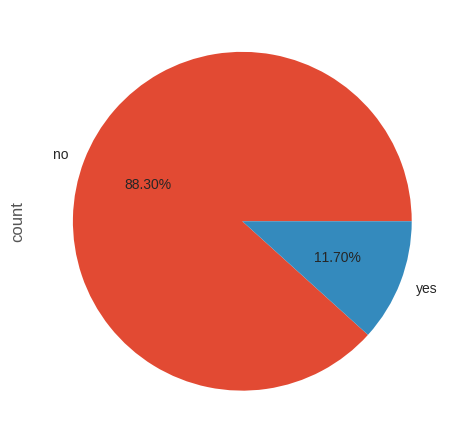

In [82]:
df['y'].value_counts().plot.pie(autopct='%0.2f%%')
show()

**Results of Marketing campaigns (Phone Calls):**

*   **No:** Majority of the marketing campaigns results in clients not subscribing with counts of about 40,000. This represent 88.3% of the dataset.
*   **Yes:** Minority of the marketing campaigns results in client subscribing with counts of about 5,000. This represent 11.70% of the dataset.



---



---





*   Distribution of Jobs of Client reached




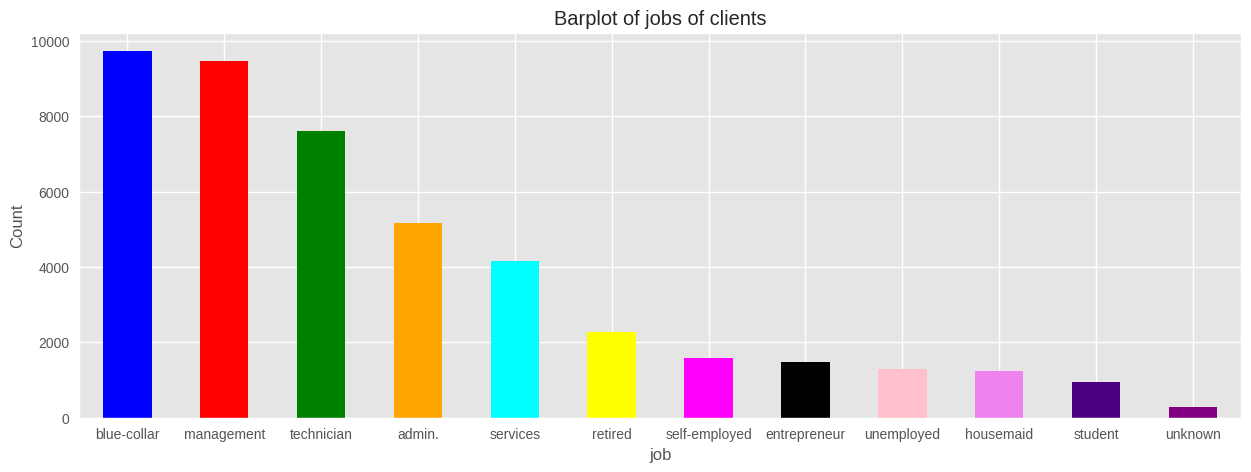

In [83]:
#Barplot of Job variable
style.use('ggplot')
figure(figsize=(15,5))
Top=df['job'].value_counts()
colors=['blue','red','green','orange','cyan','yellow','magenta','black','pink','violet','indigo','purple']
Top.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('Count')
title('Barplot of jobs of clients')
show()



*   **Most common job:** Majority of the marketing campaigns reached **blue collor** job workers with a count exceeding 8000. **Management,technician and admin **follows.
*   **Least common job:** Minority of the marketing campaigns reached clients who were **self-employed, entreprenuer, unemployed, housemaid or students**, with counts less than 2000 for each.

*   **Unknown job:** We had clients whose job was **unknown**.







---



---





*   Distribution of Marital Status of Client reached




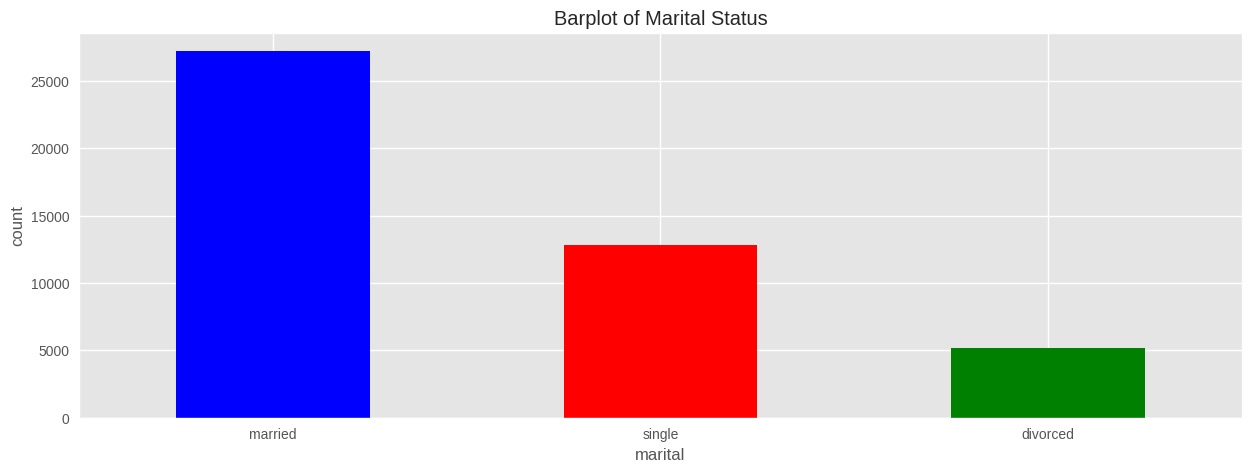

In [84]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['marital'].value_counts()
colors=['blue','red','green']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('count')
title('Barplot of Marital Status')
show()


*   **Dorminant Marital Status:** The most common type of marital status is **married**, with a count
significantly exceeding 2500. This type overwhelmingly dominates the dataset.
*   **Minority Marital Status:** All other status types are present in much smaller numbers, with counts less than 15000 for **single** and 5,000 for **divorced** which happens to be the least.









---



---





*   Distribution of Educational Status of Client reached




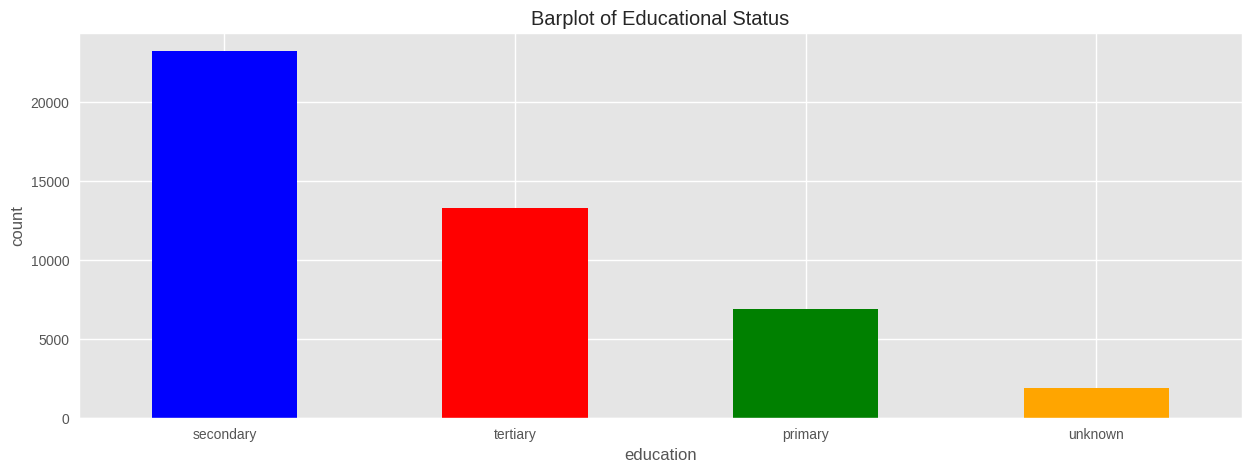

In [85]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['education'].value_counts()
colors=['blue','red','green','orange']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('count')
title('Barplot of Educational Status')
show()


*   **Dorminant Educational Status:** Majority of the clients campaigned to completed **secondary**, with a count significantly exceeding 25000. This type overwhelmingly dominates the dataset.
*   **Minority Educational Status:** Clients who had **tertiary** education followed, with counts less than 15000 and a little over 5,000 for clients who had only **primary** education.
*   **Unknown Educatioanal Status:** The dataset had clients whose educational status was **unknown**











---



---





*   Distribution of Previous Campaign outcome of Client reached




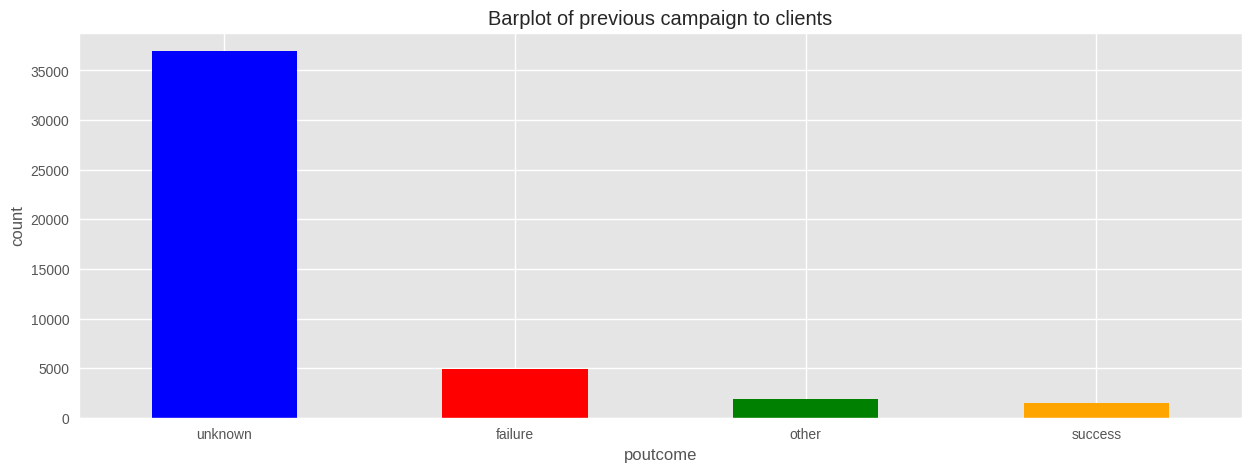

In [86]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['poutcome'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal')
ylabel('count')
title('Barplot of previous campaign to clients')
show()


*   **Unknown Status:** It is unfornate that it is unknown the previous campaign status of the majority of the clients. This type of overwhelmingly more than 35000 clients dominates the dataset.
*   **Failure Status:** Clients who failed to subscribe to previous campaign followed, with counts of about 5000 and other less than 2500.
*   **Success Status:** The dataset had least number of clients who had subscribed to previous marketing campaign.











---



---





*   Distribution of Last contact month, when client were reached




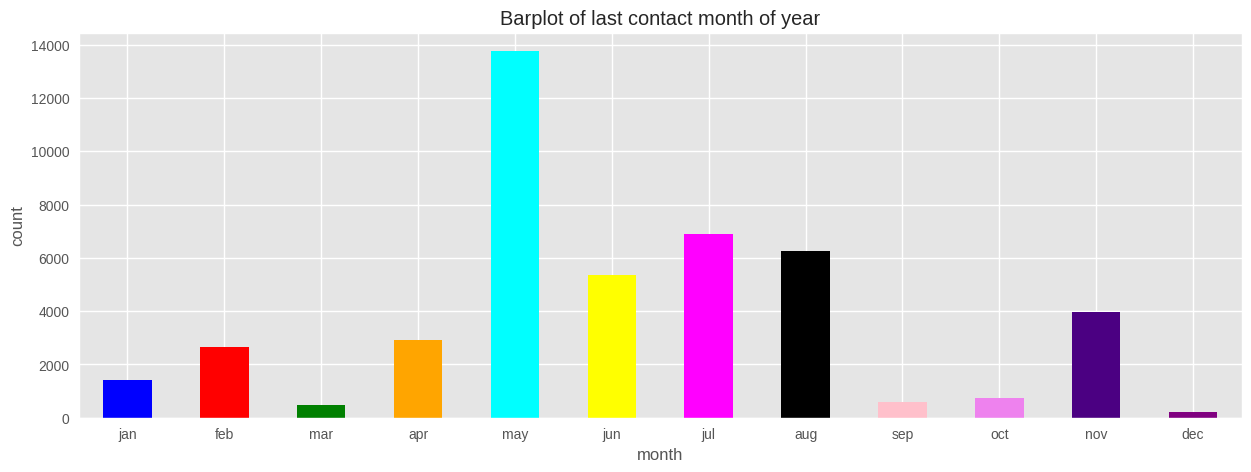

In [87]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
month_counts = df['month'].value_counts().reindex(month_order)
style.use('ggplot')
figure(figsize=(15,5))
colors=['blue','red','green','orange','cyan','yellow','magenta','black','pink','violet','indigo','purple']
month_counts.plot(kind='bar',color=colors)
xticks(rotation='horizontal')
ylabel('count')
title('Barplot of last contact month of year')
show()






*   **First Quarter:** This quarter has month of February and April reaching most clients.
*   **Second Quarter:** This quarter reached most clients among all. In the month of May is when most clients were reached and it stands out among all months in year. Next to in that quarter was June.
*   **Third Quarter:** The dataset had July and August being months most clients were reached.
*   **Fourth Quarter:** Among all the quarters this has least number of clients reached in the dataset.




---


*   In the dataset, second and third quarter is when most clients were reached







---



---





*   Distribution of clients with credit in default




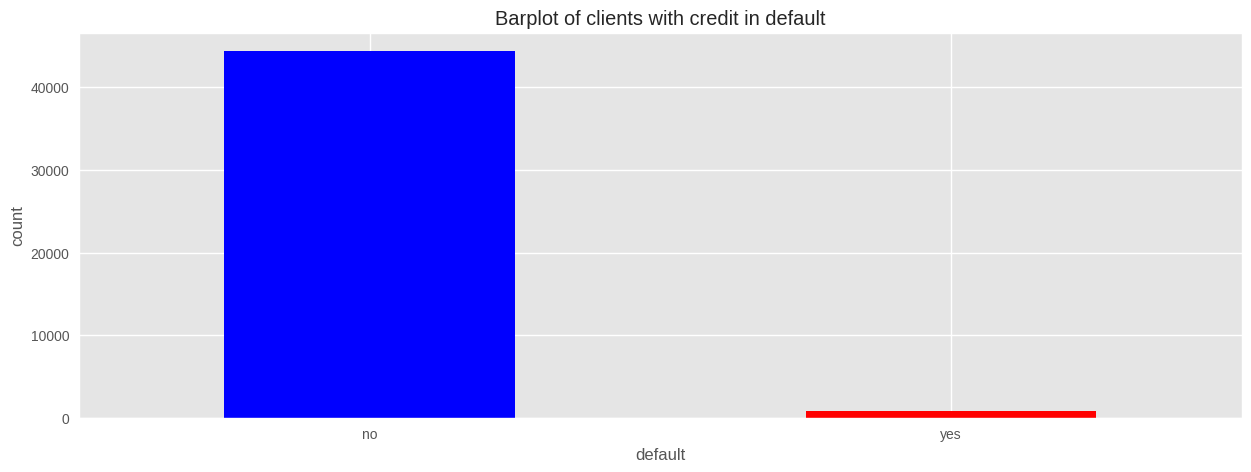

In [88]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['default'].value_counts()
colors=['blue','red']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('count')
title('Barplot of clients with credit in default')
show()

**Dorminant clients without default**

*   **no:** It can be seen that over 40000 of the clients had no default in credit.

**Rare clients with default**

*   **yes:** Just a few had clients had default in credit




---


---








*   Distribution of clients with personal loan




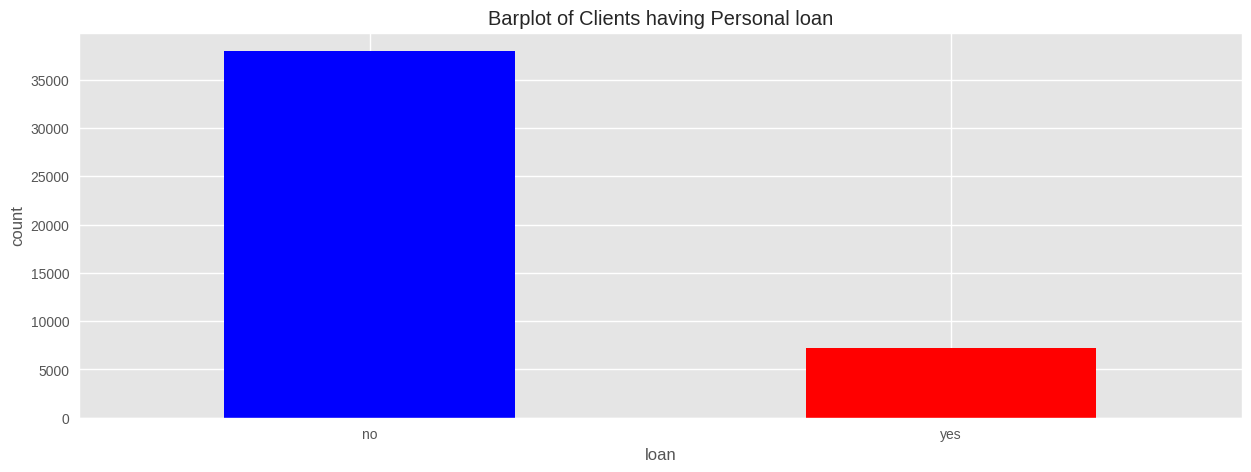

In [89]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['loan'].value_counts()
colors=['blue','red']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('count')
title('Barplot of Clients having Personal loan')
show()

**Dorminant clients without default**

*   **no:** It can be seen that over 35000 of the clients had no personal loan.

**Rare clients with default**

*   **yes:** Just a few had persoanl loan with count a little over 5000




---


---








*   Distribution of clients last contact day of the month




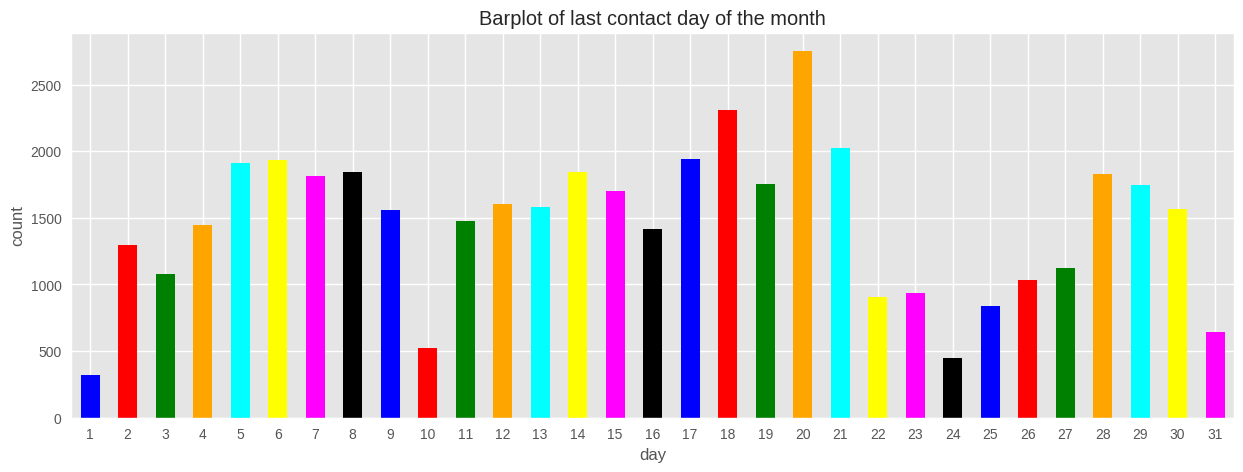

In [90]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['day'].value_counts().sort_index()
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
ylabel('count')
title('Barplot of last contact day of the month')
show()

**Dorminant days contacted**

*   **20th:** It can be seen that this day happens to when the clients had been contacted the most.

*   **18th:** It can be seen that this day happens to be next dorminant day when the clients had been contacted the most.



**Rare day contacted**

*   **1st:** Just a few had clients were contacted on this day




---


---








*   **Distribution of clients Age**



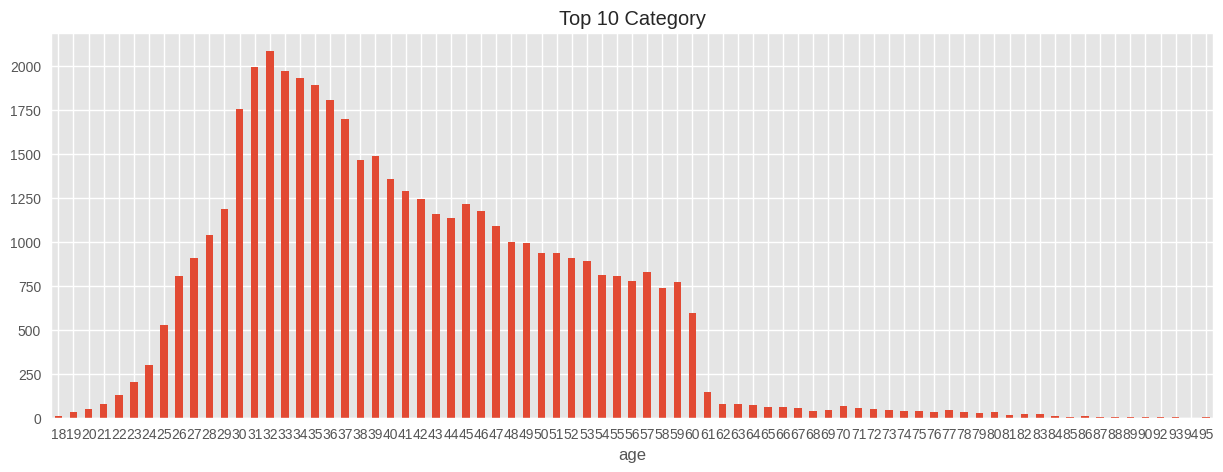

In [91]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['age'].value_counts().sort_index()
Top10.plot(kind='bar')
xticks(rotation='horizontal' )
title('Top 10 Category')
show()



*   **Shape of the Distribution:** The distribution of 'Age' is right-skewed (positively skewed). This means that the tail of the
distribution extends further to the right, indicating that there are data points with
very high age.
*   **Peak Concentration:** The highest frequency (count) of age occurs in the range of approximately 30 to 37. This is where the tallest bars of the barplot are located.
*   **Presence of Lower and higher age (Outliers/Tail):** While the majority of sales are in the lower to mid-range, there's a long tail extending towards higher age (up to 95 years). This indicates that there are some clients reached who are at much higher age, but they are less frequent.
*   **No Age Below a Certain Price:** The distribution starts from an age of 18years, suggesting that there are no client reached below 18.




---





*   **Clients subscription by Age, Duration and Balance**



Text(0.5, 0.98, 'Clients subscription by Age, Duration and Balance')

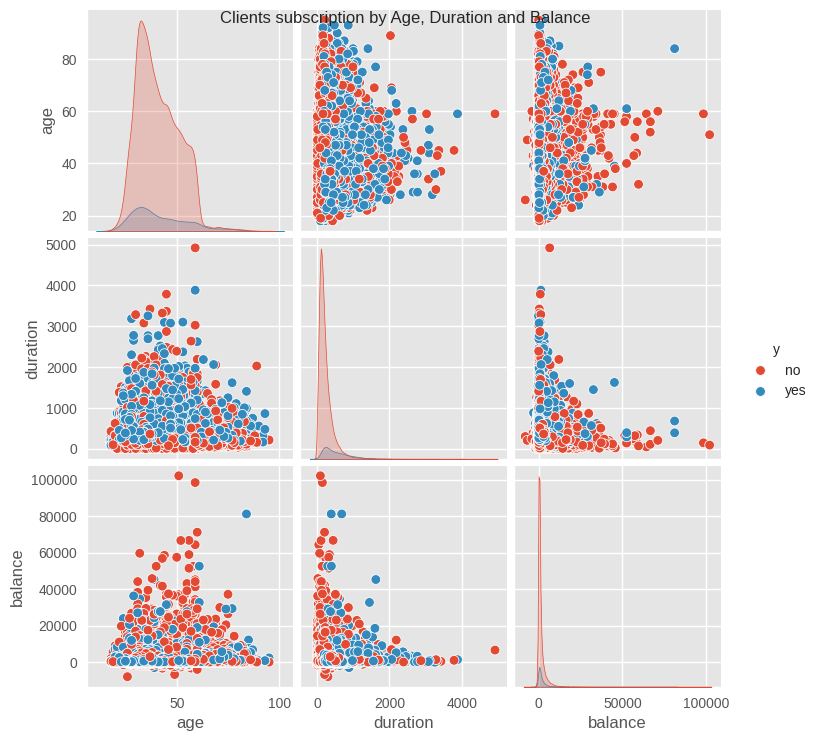

In [92]:
pp=sns.pairplot(data=df[['age', 'duration','balance', 'y']], hue='y', height=2.5)
pp.fig.suptitle("Clients subscription by Age, Duration and Balance")



*   **Subscription by Age and Balance:** The distribution is densed around age of 25 to 55 having a balance between 0 to 30000. The dense has larger number of client with yes for subscribing.This means that the client who fall with this range is likely to subscribe.
*   **Subscription by Age and Duration:** The distribution is densed around age of 25 to 50 having a duration between 0 to 2000. The dense has larger number of client with yes for subscribing.This means that the client who fall with this range is likely to subscribe. There is also successful campaign for client who aged above 70 with duration from 0 to 1000.
*   **Subscription by Balance and Duration:** While the majority of clients subscribed with a balance less than 20000 their duration falls between 0 to 4000. However, their are clients who subscribed with high balance above 80000. This indicates that there are some clients reached who successfully subscribed with balance less than 20000 with duration less than 2000.



---







*   **Clients subscription by Day, Pdays and Campaign**



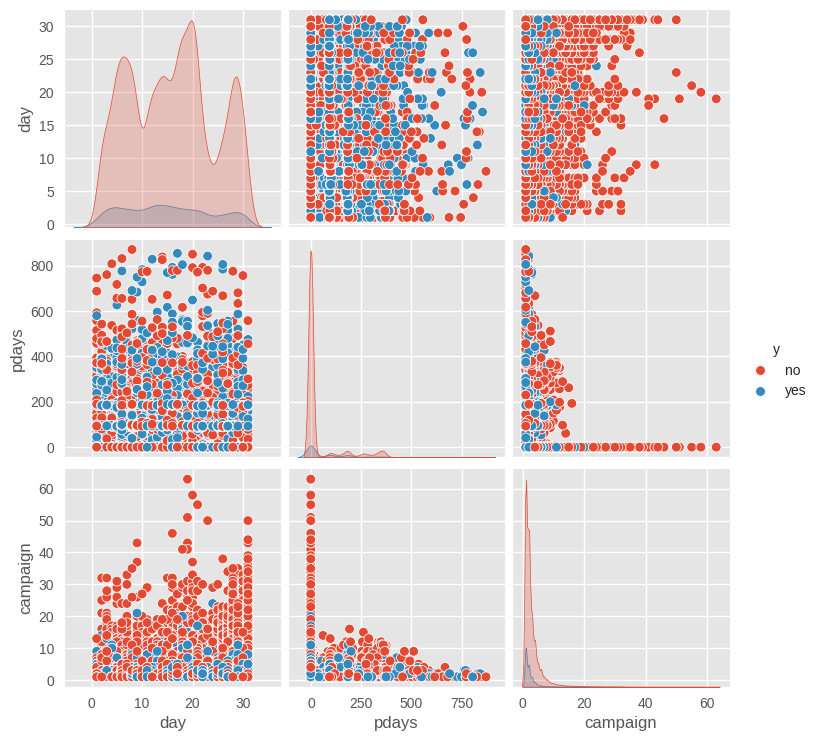

In [93]:
pp=sns.pairplot(data=df[['day', 'pdays','campaign', 'y']], hue='y', height=2.5)




*   **Subscription by Day and Campaign:** The distribution shows clients who subscribed to be campaign towards any day of the month. The campaign reached a larger number of client with between 0 to 25 campaigns at a client yielding a positive response.This means however that campaign within this threshold is okay to decide if a client will subscribe.
*   **Subscription by Day and Pday:** The distribution is scattered all around.
*   **Subscription by Pday and Campaign:** While the majority of clients subscribed with a number of days that passed by after the client was last contacted from a previous campaign. However, the campaign towards these clients was less than 10. This indicates that there are some clients reached who successfully subscribed with less campaign having a number of days that passed by after the previous campaign .



---





##Data Cleaning

In [94]:
#Remove all duplicates rows
df.drop_duplicates(inplace=True)

In [95]:
df.shape

(45211, 17)

In [96]:
#removing rows with unknown as observation in selected columns
df_clean = df[~((df['job']=='unknown') |(df['marital'] == 'unknown') |(df['education'] == 'unknown') |(df['default'] == 'unknown') |(df['housing'] == 'unknown') | (df['loan'] == 'unknown'))]

In [97]:
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [98]:
#check dataframe columns
df_clean.shape

(43193, 17)

##Feature Selection and Engineering

Transform train data

In [99]:
#Detecting numerical features from data
num_cols = df_clean._get_numeric_data().columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [100]:
#Detecting categorical features in data
categorical_columns=list(set(df_clean.columns) - set(num_cols))
categorical_columns

['default',
 'contact',
 'loan',
 'month',
 'job',
 'housing',
 'poutcome',
 'education',
 'y',
 'marital']

In [101]:
#Encoding categorical features with label encoding
for column in categorical_columns:
    df_clean[column] = LabelEncoder().fit_transform(df_clean[column])

#print(df_clean)

In [102]:
#check dataframe
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [103]:
#check shape
df_clean.shape

(43193, 17)

In [104]:
#Checking Imbalance representation in target feature
df_clean['y'].value_counts()

,count
y,
0,38172
1,5021


In [105]:
#Percentage of imbalance data in target feature
print('0 (y)', round(df_clean['y'].value_counts()[0]/len(df_clean) * 100,2), '% of the dataset')
print('1 (y)', round(df_clean['y'].value_counts()[1]/len(df_clean) * 100,2), '% of the dataset')

0 (y) 88.38 % of the dataset
1 (y) 11.62 % of the dataset


Transform test data

In [106]:
#Detecting numerical features from data
num_colst = dft._get_numeric_data().columns
num_colst

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [107]:
#Detecting categorical features in data
categorical_columnst=list(set(dft.columns) - set(num_cols))
categorical_columnst

['default',
 'contact',
 'loan',
 'month',
 'job',
 'housing',
 'poutcome',
 'education',
 'y',
 'marital']

In [108]:
#Encoding categorical features with label encoding
for column in categorical_columnst:
    dft[column] = LabelEncoder().fit_transform(dft[column])

#print(df_clean)

## Splitting data into Train and Test set

In [109]:
# Separate input features (X) and target variable (y)
y_train = df_clean.y
X_train = df_clean.drop('y', axis=1)
X_test = dft.drop('y', axis=1)
y_test = dft.y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Smote oversampling of targer variable

In [110]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [111]:
# Display results
print("Original dataset shape:", X_train.shape, y_train.value_counts())
print("Resampled dataset shape:", X_resampled.shape, pd.Series(y_resampled).value_counts())

Original dataset shape: (43193, 16) y
0    38172
1     5021
Name: count, dtype: int64
Resampled dataset shape: (76344, 16) y
0    38172
1    38172
Name: count, dtype: int64


## Training and Evaluating Classification Predictive Models

In [112]:
f1=[]
accuracy=[]
precision=[]
recall=[]
auc=[]
def reg(model):
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  F1 = f1_score(y_test,pred)
  ACCURACY = accuracy_score(y_test,pred)
  PRECISION = precision_score(y_test,pred)
  RECALL = recall_score(y_test,pred)
  AUC = roc_auc_score(y_test, pred)
  f1.append(F1)
  accuracy.append(ACCURACY)
  precision.append(PRECISION)
  recall.append(RECALL)
  auc.append(AUC)

In [113]:
XGBoostClassifier_model = XGBClassifier()
LogisticRegressionClassifier_model = LogisticRegression(penalty='l2', C=0.1)
NaiveBayesClassifier_model = GaussianNB()
DecisionTreeClassifier_model = DecisionTreeClassifier()
RandomForestClassifier_model = RandomForestClassifier()
KNearestNeighborsClassifier_model = KNeighborsClassifier()
GradientBoostingClassifier_model = GradientBoostingClassifier()

In [114]:
reg(XGBoostClassifier_model)
reg(LogisticRegressionClassifier_model)
reg(NaiveBayesClassifier_model)
reg(DecisionTreeClassifier_model)
reg(RandomForestClassifier_model)
reg(KNearestNeighborsClassifier_model)
reg(GradientBoostingClassifier_model)

Comparing model performance metrics

In [115]:
#making table of models
Algorithms = ['XGBoostClassifier_model','LogisticRegressionClassifier_model','NaiveBayesClassifier_model','DecisionTreeClassifier_model','RandomForestClassifier_model','KNearestNeighborsClassifier_model','GradientBoostingClassifier_model']

In [116]:
#making metrics of models performance
result=DataFrame({'Algorithms':Algorithms,'f1':f1,'accuracy':accuracy,'precision':precision,'recall':recall,'auc':auc})
result

,Algorithms,f1,accuracy,precision,recall,auc
0,XGBoostClassifier_model,0.754678,0.947799,0.823129,0.696737,0.838619
1,LogisticRegressionClassifier_model,0.256186,0.886972,0.530120,0.168906,0.574703
2,NaiveBayesClassifier_model,0.383906,0.837425,0.340774,0.439539,0.664395
3,DecisionTreeClassifier_model,0.973384,0.993807,0.964218,0.982726,0.988988
4,RandomForestClassifier_model,0.974212,0.994028,0.969582,0.978887,0.987443
5,KNearestNeighborsClassifier_model,0.521739,0.909976,0.672727,0.426104,0.699552
6,GradientBoostingClassifier_model,0.491726,0.904888,0.640000,0.399232,0.684991


Comparing model performance



*   **RandomForestClassifier_model:** stands out as the best-performing algorithm among the six:
It has the highest f1 value (0.979827),accuracy value (0.995355),precision value (0.980769),recall value (0.978887) and auc value of (0.999254) indicating that it explains a significantly larger proportion of the variance in the target variable
compared to Linear Regression and Ridge.


*   **DecisionTreeClassifier_model:** perform very similarly: The f1 value (0.970504),accuracy value (0.993143),precision value (0.962264),recall value (0.978887) and auc value of (0.999254). However, the performance those not surpass random forest classifier.

*   **Other models:** performance metrics were all below that of decision tree and random forest classifier.


## Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.98      0.98      0.98       521

    accuracy                           1.00      4521
   macro avg       0.99      0.99      0.99      4521
weighted avg       1.00      1.00      1.00      4521

0.9951338199513382
[[3989   11]
 [  11  510]]
precision =  0.9788867562380038 
 recall =  0.9788867562380038


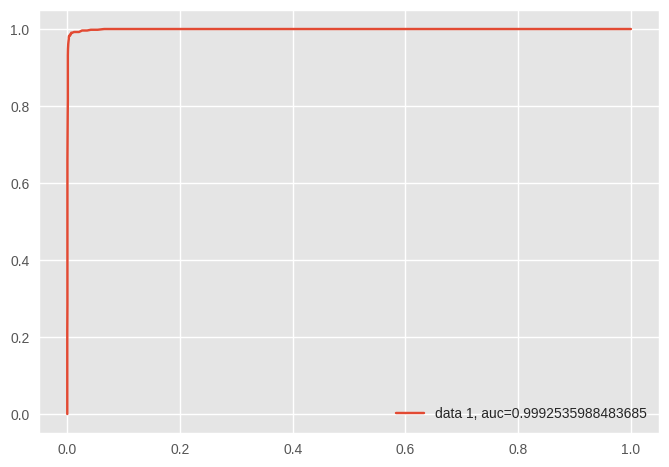

In [117]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train,y_train)

pred = ran.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#Feature Importance of the Best Model (Random Forest Classifier)

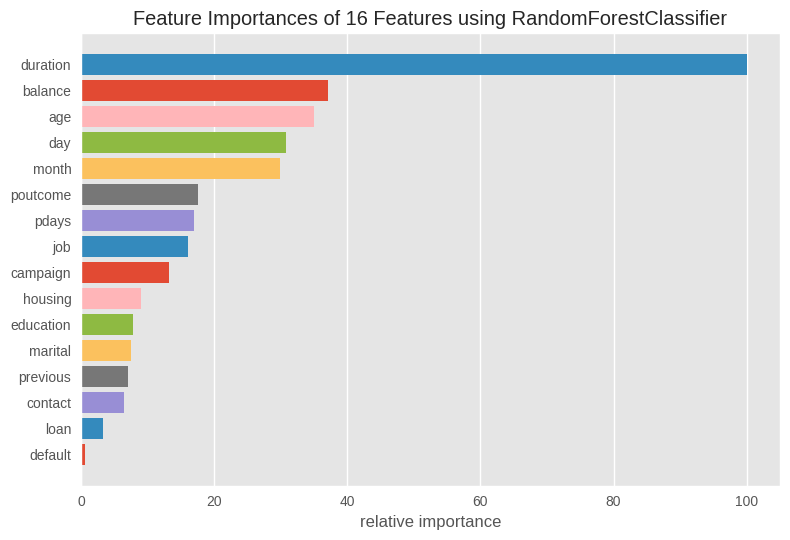

<Axes: title={'center': 'Feature Importances of 16 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [118]:
#Feature Selection for Random Forest
ran_for=RandomForestClassifier()
viz = FeatureImportances(ran_for)
viz.fit(X_train,y_train)
viz.show()



*   **Feature importance:** The rank of features that drive the random forest classifier model from the highest are duration,balance,age,day,month,poutcome,pdays,job,campaign,housing,previous,education,marital,contact,loan,default.


*   **Top five features:** duration, balance, age, day, month.






## Saving best performing model

In [119]:
# Save the model as a pickle in a file
joblib.dump(RandomForestClassifier_model, 'RandomForestClassifier_model.pkl', compress=3)

['RandomForestClassifier_model.pkl']

In [120]:
#load model
joblib.load('RandomForestClassifier_model.pkl')

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Findings and Insights



1.   Exploratory Data Analysis (EDA)





*   Majority of the marketing campaigns results in clients not subscribing with counts of about 40,000. This represent 88.3% of the dataset.
*   Minority of the marketing campaigns results in client subscribing with counts of about 5,000. This represent 11.70% of the dataset.
*   Most common job: Majority of the marketing campaigns reached blue color job workers with a count exceeding 8000. Management, technician and admin follows.
*   The highest frequency (count) of age occurs in the range of approximately 30 to 37. This is the age range which marketing campaign most reach.
*   The distribution is dense around age of 25 to 55 having a balance between 0 to 30000. The dense has larger number of client with yes for subscribing. This means that the client who fall with this range is likely to subscribe.












2. Best performing model: Random Forest


*   Accuracy: 99.5%
*   Precision: 98.1%
*   Recall: 97.8%
*   ROC AUC: 0.99






3. Feature Importance


*   Duration of last contact
*   Balance
*   Age
*   Day of contact
*   Month of contact
*   Previous campaign outcome





4. Conclusion & Recommendations



*   The project successfully demonstrates how machine learning can predict customer behavior in marketing.
*   Based on the model, campaign managers should prioritize customers contacted in recent successful campaigns, the balance of clients, the age and consider the time of month and contact duration.
*   Future improvements could include real-time data integration and model retraining pipelines




